# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 13__

__Nombres de los estudiantes: Esther Babon Arcauz y Claudia López-Mingo Moreno__

In [ ]:
RANDOM_STATE = 333

# Apartado 1: Clasificador de noticias

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no debes usarlo para clasificar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías. Indica si debemos tenerlo en cuenta de alguna forma al analizar los modelos que construyamos.

Muestra un mensaje cualquiera y explica si lo habrías clasificado en la clase correcta tras leerlo.

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

In [ ]:
##Primero debemos importar la herramienta de pande desde numpy
import numpy as np
import pandas as pd

In [ ]:
##para poder ejecutarlo desde google collaborate 
from google.colab import files
uploaded = files.upload()

Saving BBC News.csv to BBC News.csv


In [ ]:
##creamos el dataframe a partir de fichero BBC News.csv
##teniendo en cuenta que la columna ArticleId es un identificador y no vamos a usarlo para clasificar
df_conID = pd.read_csv('BBC News.csv')
##el df que vamos a usar no va a tener la columna de ArticleId, podriamos usarlo como valor de columna pero como no estan ordenadas ni numeradas en desde el 0 hasta 1489 nos dificultara el trabajo
df = df_conID.loc[:,['Text', 'Category']]
df

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
1485,double eviction from big brother model caprice...,entertainment
1486,dj double act revamp chart show dj duo jk and ...,entertainment
1487,weak dollar hits reuters revenues at media gro...,business
1488,apple ipod family expands market apple has exp...,tech


In [ ]:
##estudiamos el tamaño del conjunto de datos 
df.describe().transpose()


,count,unique,top,freq
Text,1490,1440,microsoft seeking spyware trojan microsoft is ...,2
Category,1490,5,sport,346


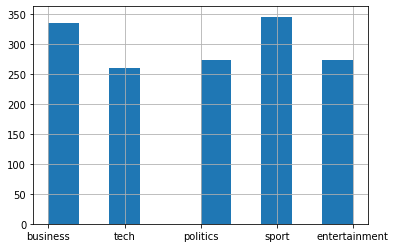

In [ ]:
##y la proporcion de las categorias 
df['Category'].hist()

In [ ]:
# Frecuencia de las clases
df['Category'].value_counts() / df['Category'].count() * 100

sport            23.221477
business         22.550336
politics         18.389262
entertainment    18.322148
tech             17.516779
Name: Category, dtype: float64

Al analizar el conjunto de datos vemos que tenemos 1490 textos, de los cuales 50 son segundas copias. Tambien vemos que los textos se categorizan en 5 grupos, la categoria en la que más textos hay es deportes con 346 textos.

Vemos que la  proporción de noticias que pertenecen a cada una de las categorías es bastante similar. Para que la proporción fuese totalmente equitativa la frecuencia de clases deveria de ser del 20%, en la celda superior vemos que todas las categorias rondan ese valor. 

Debemos tener en cuenta esta proporción a la hora de analizar los diferentes modelos de lenguaje que construyamos. Si vamos a usar un modelo de lenguaje probabilístico, el cual define una distribucción de probabilidad sobre un conjunto de elementos a partir de los valores observados, sabremos que los valores que observará estarán distribuidos equitativamente. Lo mismo ocurrira si usamos un modelo basado en bolsa de palabras. 



In [ ]:

df.loc[1, ['Text']]

##habríamos clasificado este texto en bussiness 
## Si lo habriamos clasificado correctamente .

Text    german business confidence slides german busin...
Name: 1, dtype: object

In [ ]:
##Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función train_test_split de sklearn.
# Como la proporción de clases a predecir está balanceada no hace falta usar la versión estratificada al hacer la partición
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Category'], test_size=0.2, random_state=RANDOM_STATE)


## 2) Representación basada en bolsa de palabras y frecuencia de aparición

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y la frecuencia de aparición de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Entrena un clasificador Naive Bayes Multinomial y calcula su tasa de aciertos sobre el conjunto de entrenamiento y el conjunto de test. A continuación calcula los valores de precisión, exhaustividad y puntuación F1 para cada una de las clases. Dibuja la matriz de confusión. Analiza los resultados obtenidos.

A continuación, entrena un clasificador k-NN con la configuración por defecto y usando la misma vectorización. Analiza los resultados, ¿a qué crees que se deben?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
##Obtenemos las frecuencias de las palabras con CountVectorizer.
vectorizer = CountVectorizer(stop_words='english', binary=False)

# Tomamos los textos del conjunto de datos de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar (english)
train_vector_data_count = vectorizer.fit_transform(X_train)
feature_names_train = vectorizer.get_feature_names()
##aplicamos vectorización al conjunto de test tambien
test_vector_data_count = vectorizer.transform(X_test)
feature_names_test = vectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

    ##AÑADIMOS ESTA FUNCIONALIDAD EXTRA PARA QUE NOS IMPRIMA DIRECTAMENTE LAS PALABRAS ELIMINADAS
    ##mostrar las palabras  que aparecen en el mensaje original pero no en el vectorizado
    if data is not None:
      mensaje_original_array = data[index].split()
      palabras_descartadas = []
      palabras_elegidas = []
      terminos_mensaje_vectorizado = terminos.compressed()
      count = 0

      for i in range(0, len(mensaje_original_array)):
        for j in range(0, len(terminos_mensaje_vectorizado)):
          if( mensaje_original_array[i] != terminos_mensaje_vectorizado[j]):
              count+= 1
          else:
              palabras_elegidas.append(mensaje_original_array[i])

        if (count == len(terminos_mensaje_vectorizado)):
              palabras_descartadas.append(mensaje_original_array[i])
        count = 0

      print('Nº de palabras eliminadas: ', len(palabras_descartadas))  
      print('Nº de palabras en el mensaje original: ' , len(mensaje_original_array))
      print('Las palabras eliminadas  son: ', palabras_descartadas)
      print('Las palabras escogidas son: ', palabras_elegidas)
      

In [ ]:
##escribimos los terminos presentes como bolsa de palabras para diferentes indices
index = 1

##en el apartado de data ponemos la lista de mensajes original para ver que muestre el texto original tambien
write_terms(feature_names_train, X_train, train_vector_data_count, index)

##con X_test no funciona
##write_terms(feature_names_test, X_test, test_vector_data_count, index)



Mensaje 1 : german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s econ


Hemos aplicado la vectorización por frecuencia de aparición de cada palabra en los conjuntos de `Text` de entrenamiento y test. En la celda superior mostramos un mensaje en su formato original y en el formato vectorizado. Las palabras eliminadas también están listadas en la celda superior. 

Según la teoría las palabras eliminadas tendrian que ser aquellas que salen con menos frecuencia en los textos, ya que a la hora de vectorizar tiene en cuenta todos los textos. 

Vemos que el número de palabras eliminadas es de 309 y el número de palabras en el texto original es de 325. Solo ha cogido las 16 palabras más frecuentes del texto






**Entrenamos un clasificador Naive Bayes Multinomial**

In [ ]:
##USAR LOS DATOS VECTORIZADOS DE LA CELDA SUPERIOR
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_vector_data_count,  y_train.to_numpy())

mnb_train_predictions = mnb_classifier.predict(train_vector_data_count)
mnb_test_predictions = mnb_classifier.predict(test_vector_data_count)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions ==  y_train.to_numpy()))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions ==  y_test.to_numpy()))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9966442953020134
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.9798657718120806


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

classifier = mnb_classifier
predictions = mnb_test_predictions
targetNames = ['sport', 'business', 'politics', 'entertainment', 'tech']
print(classification_report(y_test.to_numpy(), predictions, target_names=targetNames))


               precision    recall  f1-score   support

        sport       0.97      0.97      0.97        73
     business       1.00      0.97      0.98        61
     politics       0.95      0.98      0.97        60
entertainment       1.00      0.98      0.99        61
         tech       0.98      1.00      0.99        43

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

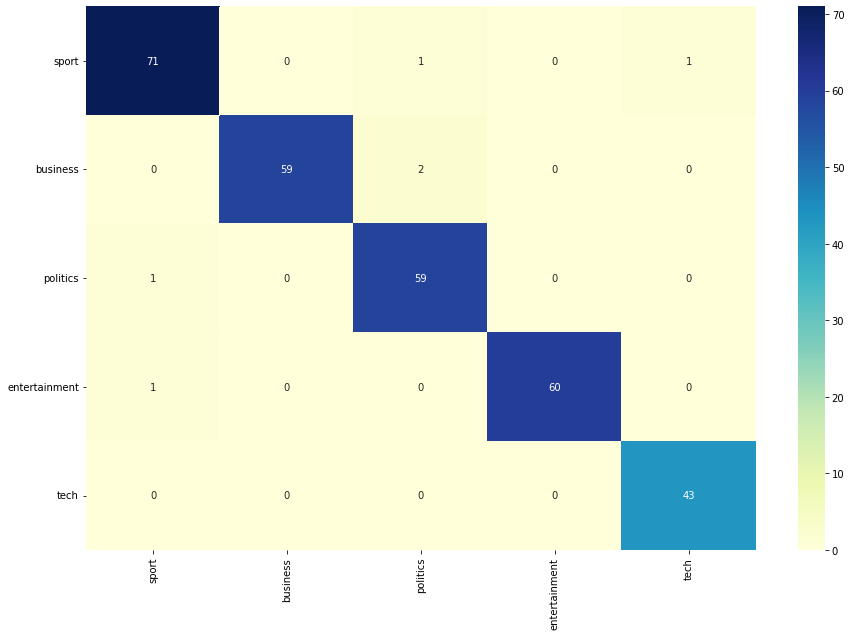

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test.to_numpy(), predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=targetNames, columns=targetNames)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

En las celdas superiores estamos usando un clasificador Naive Bayes. Según el teorema de Bayes, dado un vector de terminos para el que queremos determinar su clase, tenemos que calcular la probabilidad condicionada de cada clase y optar por la clase más probable. Este clasificador simplifica la realidad asumiendo que todas las variables utilizadas para clasificar son independientes, esta hipótesis sera incorrecta en muchos casos, sin embargo, obtiene mejores resultados que otros clasificadores con tecnicas mas sofisticadas.


Si analizamos los resultados obtenidos, vemos que tiene una precission, exhaustividad y valor f1 del 98%. Son valores muy buenos para el clasificador. En la celda superior vemos la matriz de confusión. A primera vista podriamos asumir que el clasificador clasifica al 100%, lo que es buena señal. Si nos fijamos un poco vemos que hay un par de celdas fuera de la diagonal principal con valores 1, que nos indica algún texto mal clasificado, pero son muy pocos. 

Podemos afirmar que es un buen clasificador.



**Entrenamos un clasificador K-NN**

In [ ]:
from sklearn import neighbors

knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(train_vector_data_count,  y_train.to_numpy())

knn_train_predictions = knn_classifier.predict(train_vector_data_count)
knn_test_predictions = knn_classifier.predict(test_vector_data_count)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions ==   y_train.to_numpy()))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions ==   y_test.to_numpy()))

k-NN, porcentaje de aciertos en entrenamiento: 0.6786912751677853
k-NN, porcentaje de aciertos en test: 0.5704697986577181


In [ ]:
classifier = knn_classifier
predictions = knn_test_predictions
targetNames = ['sport', 'business', 'politics', 'entertainment', 'tech']
print(classification_report(y_test.to_numpy(), predictions, target_names=targetNames))

               precision    recall  f1-score   support

        sport       0.97      0.44      0.60        73
     business       0.83      0.41      0.55        61
     politics       0.93      0.62      0.74        60
entertainment       0.34      1.00      0.51        61
         tech       1.00      0.35      0.52        43

     accuracy                           0.57       298
    macro avg       0.81      0.56      0.58       298
 weighted avg       0.81      0.57      0.59       298



(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

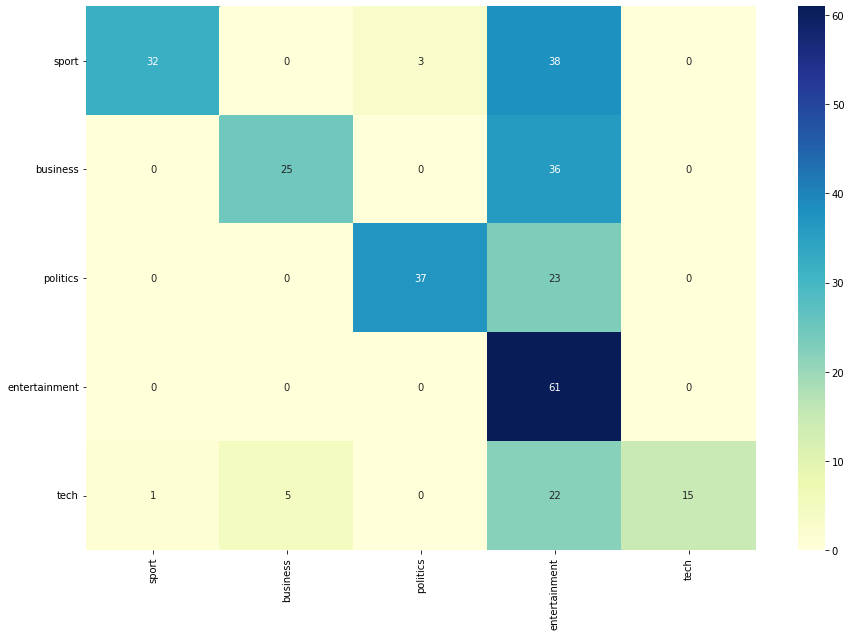

In [ ]:
conf_matrix = confusion_matrix(y_test.to_numpy(), predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=targetNames, columns=targetNames)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

En las celdas superiores estamos usando un clasificador K-NN. Este algoritmo clasifica cada dato nuevo en el grupo que corresponda, según tenga k vecinos más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias.


Si analizamos los resultados obtenidos, vemos que tiene una precission del 81%, exhaustividad del 56% y valor f1 del 58%. La verdad es que son valores malos para un clasificador, sobre todo si lo comparamos con el clasificador de Naive Bayes. Podemos ver que para la categoria de tech lo clasifica con una precision del 100% pero tiene una exhaustividad muy baja, 35%. Por otro lado podemos ver tambien que para la categoria de entertainment tiene una precision del 34% pero una exhaustividad del 100%. En general afirmamos que es un mal clasificador.

Para ver lo afirmado anteriormente tenemos la matriz de consufión en la celda superior. Si fuese un buen clasificador la diagonal principal es lo único que veriamos, pero en este caso vemos que no es asi. Vemos que en la columna de la categoria entertainment tiene  muchos falsos positivos. Como hemos visto antes tiene una precision del 34% y una exhaustividad del 100% porque categoriza todos los textos de la categoria entertainment en entertainment pero tambien muchos otros que no son de su categoria. 

Si nos fijamos en la columna de tech tambien tenemos cosas que comentar. Hemos dicho que tiene una precision del 100% y una exhaustividad del 35%, esto quiere decir que todo texto que clasifica como tech es de la categoria tech, pero se le quedan textos de la categoria tech categorizados en otras categorias, en la celda superior vemos que 22 textos de categoria tech los categoriza en la categoria entertainment. 


Podemos afirmar que es un clasificador malo.

Comparando los dos clasificadores, afirmamos que el mejor es el Naive Bayes. Hemos comentado anteriormente que este clasificador simplifica la realidad asumiendo que todas las variables utilizadas para clasificar son independientes, esta hipótesis sera incorrecta en muchos casos, sin embargo, hemos visto que obtiene mejores resultados que otros clasificadores con tecnicas mas sofisticadas

## 3) Representación basada en word-embeddings

La segunda vectorización que vamos a usar representará los mensajes usando word-embeddings. Cada documento se representará como el vector que resulta de promediar los embeddings de cada una de sus palabras. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings. 

Entrena un clasificador Naive Bayes Gaussiano (el Multinomial no admite valores negativos que sí aparecen en los embeddings). Analiza el error por clase y dibuja la matriz de confusión.

Entrena otro clasificador kNN con la nueva vectorización y la configuración por defecto y analiza su error.

In [ ]:
##para poder ejecutarlo desde google collaborate 
from google.colab import files
uploaded = files.upload()

Saving words.txt to words.txt


In [ ]:
##cargamos el fichero words.txt proporcionado en el campus 
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Traducimos el fichero glove a un fichero con formato word2vec
glove_file = 'words.txt'

# Gensim 3 requiere hacerlo en varios pasos
word2vec_file = 'words.txt.word2vec'
glove2word2vec(glove_file, word2vec_file)
model = KeyedVectors.load_word2vec_format(word2vec_file, binary=False)



In [ ]:
# En Gensim 3 se pueden obtener de la siguiente manera
words = list(model.vocab.keys())

print(words[0:10])


['2', '1080', '&c', '10-point', '10th', '11-point', '12-point', '16-point', '18-point', '1st']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# En vocabulary le pasamos el de la word-embedding, ponemos que pase los tokens a minusculas 
# Si usamos la lista de palabras vacías del inglés de sklearn quitamos artículos, preposiciones, etc 
vectorizer = CountVectorizer(vocabulary = words,  stop_words='english', binary = False)

##TENEMOS EL VECTORIZER AHORA HAY QUE USAR LOS CLASIFICADORES CON ESTE VECTORIZADO
train_preprocessed_embedded = vectorizer.fit_transform(X_train)
test_preprocessed_embedded = vectorizer.transform(X_test)
feature_names = vectorizer.get_feature_names()



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
##Usando un clasificador gaussiano
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()

chunk_size=20
num_rows=len(y_train.to_numpy())

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_preprocessed_embedded[i*chunk_size : (i+1)*chunk_size,:].toarray()
    target_chunk = y_train[i*chunk_size : (i+1)*chunk_size]
    gnb_classifier.partial_fit(train_chunk, target_chunk, classes=np.unique(y_train.to_numpy()))
  
# Creamos los arrays antes para ser más eficiente (crea el array grande y luego lo rellena)
gnb_train_predictions=np.zeros_like(y_train.to_numpy())
gnb_test_predictions=np.zeros_like(y_test.to_numpy())



for i in range(0, (num_rows//chunk_size) + 1):
    train_chunk = train_preprocessed_embedded[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_train_predictions[i*chunk_size : (i+1)*chunk_size] = gnb_classifier.predict(train_chunk)
    
num_rows=len(y_test.to_numpy())
for i in range(0, (num_rows//chunk_size) + 1):
    test_chunk = test_preprocessed_embedded[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_test_predictions[i*chunk_size : (i+1)*chunk_size] = gnb_classifier.predict(test_chunk)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictions == y_train.to_numpy()))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictions == y_test.to_numpy()))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9991610738255033
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.8657718120805369


In [ ]:
##evaluamos el clasificador

classifier = gnb_classifier
predictions = gnb_test_predictions
targetNames = ['sport', 'business', 'politics', 'entertainment', 'tech']
y_test.to_numpy()
print(classification_report(y_test.to_numpy(), predictions, target_names=targetNames))

               precision    recall  f1-score   support

        sport       0.90      0.89      0.90        73
     business       0.87      0.77      0.82        61
     politics       0.85      0.83      0.84        60
entertainment       0.98      0.92      0.95        61
         tech       0.71      0.93      0.81        43

     accuracy                           0.87       298
    macro avg       0.86      0.87      0.86       298
 weighted avg       0.87      0.87      0.87       298



(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

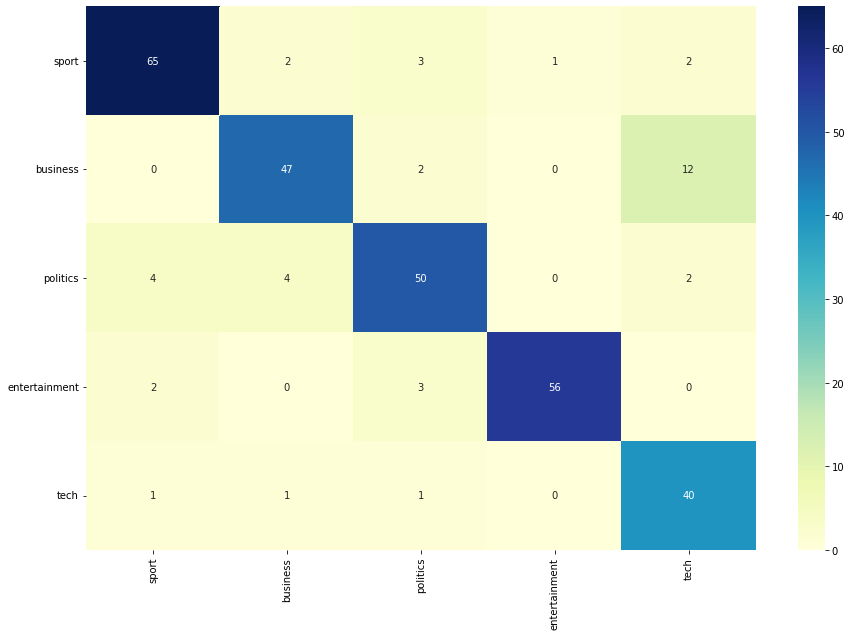

In [ ]:

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=targetNames, columns=targetNames)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

En la celda superior tenemos la matriz de confusión del clasificador Naive Bayes Gausianno con word-embedding. A primera vista podriamos decir que clasifica bastante bien, pero vemos que para la categoria tech clasifica 12 textos de la categoria bussiness como tech, por eso tiene una precision del 71%.

En general tiene una precission, exhaustividad y valor f1 del 87%, que son valores bastante buenos. 

**Ahora lo mismo pero con el clasificador KNN usando word embedding**

In [ ]:
from sklearn import neighbors

knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(train_preprocessed_embedded,  y_train.to_numpy())

knn_train_predictions_embedded = knn_classifier.predict(train_preprocessed_embedded)
knn_test_predictions_embedded = knn_classifier.predict(test_preprocessed_embedded)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions_embedded ==   y_train.to_numpy()))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions_embedded ==   y_test.to_numpy()))

k-NN, porcentaje de aciertos en entrenamiento: 0.587248322147651
k-NN, porcentaje de aciertos en test: 0.5033557046979866


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
classifier = knn_classifier
predictions = knn_test_predictions_embedded
targetNames = ['sport', 'business', 'politics', 'entertainment', 'tech']
print(classification_report(y_test.to_numpy(), predictions, target_names=targetNames))

               precision    recall  f1-score   support

        sport       0.81      0.30      0.44        73
     business       0.96      0.41      0.57        61
     politics       1.00      0.47      0.64        60
entertainment       0.30      1.00      0.46        61
         tech       1.00      0.33      0.49        43

     accuracy                           0.50       298
    macro avg       0.82      0.50      0.52       298
 weighted avg       0.80      0.50      0.52       298



(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

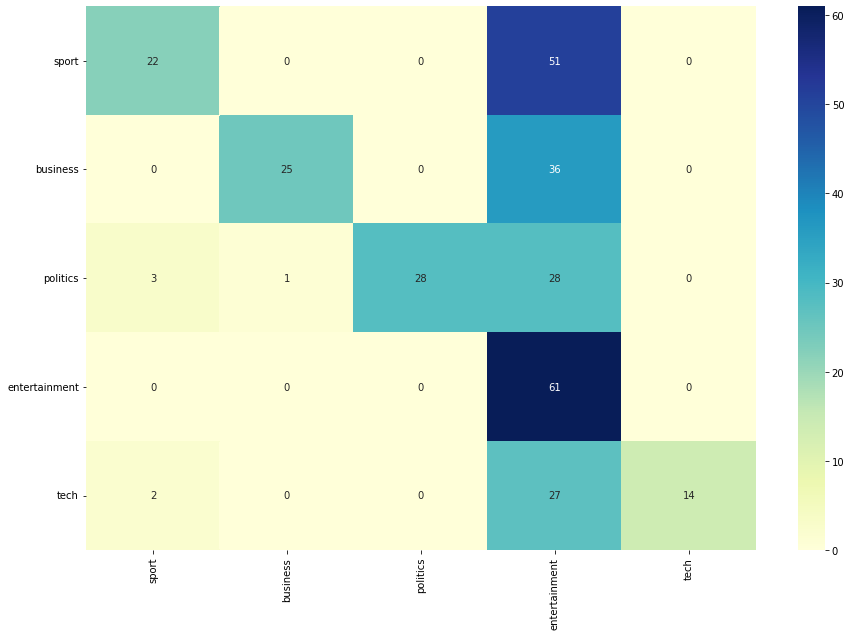

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test.to_numpy(), predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=targetNames, columns=targetNames)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

En la celda superior tenemos la matriz de confusión del clasificador K-NN con word-embedding. Vemos que para la categoria de entretainment la precission es mala. Categoriza muschos textos que no son de esta categoria en esta. Tiene una precision del 30%, un valor malo.

Anteriormente hemos usado el clasificar k-nn con CountVectorizer y tambien hemos tenido valores malos, pero eston son peores. 

## 4) Análisis comparativo final

Hemos entrenado dos clasificadores usando dos vectorizaciones diferentes de los datos. Compara la tasa de acierto de todos ellos y explica a qué crees que se deben las diferencias.

Busca un mensaje mal clasificado por el Naive Bayes con vectorización de frecuencias y otro mal clasificado por el k-NN con Word-embeddings. Analiza los vectores de términos de dichos mensajes e intenta razonar por qué ha sido clasificado erróneamente.

Para el Naive Bayes con vectorización de frecuencias, elige dos clases donde el clasificador no haya funcionado bien y analiza las palabras más relevantes para clasificar una noticia como de dichas clases. Razona si lo que ves crees que influye en la posible confusión a la hora de clasificar entre dichas clases.

Usando CountVectorizer
> Naive Bayes Multinomial:
*   Precision: 98%
*   Exhaustividad: 98% 
*   F1: 98%

> K-NN:
*   Precision: 81%   
*   Exhaustividad: 57%
*   F1: 59%

Usando Word-embedding

> Naive Bayes Gaussiano:
*   Precision: 87%
*   Exhaustividad:87% 
*   F1: 87%

> K-NN:
*   Precision: 80%
*   Exhaustividad: 50%
*   F1: 52%


Comparando los clasificadores, afirmamos que el mejor es el Naive Bayes. Hemos comentado anteriormente que este clasificador simplifica la realidad asumiendo que todas las variables utilizadas para clasificar son independientes, esta hipótesis sera incorrecta en muchos casos, sin embargo, hemos visto que obtiene mejores resultados que el clasificador K-NN que usa tecnicas más sofisticadas.

Comparando las vectorizaciones, vemos que obtiene mejores resultados la vectorización de frecuencias. Esto se debe a que el clasificador ha aprendido usando la bolsa de palabras de los textos que despues clasificará. En el caso de word-embedding, el clasificador aprende usando la bolsa de palabras que hemos importado desde words.txt. Tiene sentido que de mejores resultados la vectorización de frecuencias ya que aprende de los textos que va a clasificar despues y no de una lista de palabras como hace el word-embedding. 

Para buscar un mensaje mal clasificado por el Naive Bayes con vectorización de frecuencias y por el K-NN con word-embeddings vamos a comparar las predicciones que sacan los clasificadores con el conjunto de test.


In [ ]:
##primero naive bayes con countvectorizer

##sacamos el indice del ultimo mensaje mal clasificado 
yTest = y_test.to_numpy()
xTest = X_test.to_numpy()

for i in range(0, len(yTest)):
  if(yTest[i] != mnb_test_predictions[i]):
    index = i


print('Mensaje mal clasificado: ')
##mostramos tambien el mensaje vectorizado
write_terms(feature_names_test, xTest, train_vector_data_count, index)
print('Clasificación esperada: ', yTest[index])
print('Clasificación dada por Naive Bayes con CountVectorizer: ', mnb_test_predictions[index])


Mensaje mal clasificado: 
Mensaje 290 : row threatens hendrix museum plan proposals to open a museum dedicated to jimi hendrix are flailing because of a row over the home of his late father.  the run-down house in seattle has already been moved wholesale once and local authorities are now demanding it be moved to another site. hendrix supporters hoped to turn the home into a museum for the guitarist.  the mayor is going to go down as the mayor who destroyed jimi hendrix s house   said ray rae marshall of the james marshall hendrix foundation. the foundation moved the building  in which al hendrix lived between 1953 and 1956  when the land it was built on was to be developed for housing in 2002. now the city of seattle wants its new plot to be used for development  giving a deadline of 22 february for the home to be moved. mr goldman said the authority had promised the house could remain on its new site and be turned into a memorial and community centre. seattle officials said no such d

Si analizamos los terminos del mensaje mal clasificado vectorizado, vemos que encontramos palabras como 'lawsuit', 'court',  'superior', 'stealing', 'ruling', 'leaking', 'legal'... que son palabras que podriamos relacionar con temas políticos. Si nos fijamos en la lista de palabras descartadas vemos palabras como 'museum', 'hendrix', 'memorial', 'guitarrist'... que son palabras que podriamos identificar en la categtoria de enterainment. 

Así analizando el mensaje vectorizado podemos entender poque  el clasificador ha clasificado el texto en la clase politics, ya que las palabras que tienen más relación con la clase entertainment han sido descartadas en la vectorización. 

In [ ]:
##ahora hacemos lo mismo con k-nn y word-embedding

yTest = y_test.to_numpy()
xTest = X_test.to_numpy()


for i in range(0, len(yTest)):
  if(yTest[i] != knn_test_predictions_embedded[i]):
    index = i

print('Mensaje mal clasificado: ')
##mostramos tambien el mensaje vectorizado
write_terms(feature_names, xTest, test_preprocessed_embedded, index)
print('Clasificación esperada: ', yTest[index])
print('Clasificación dada por K-NN con Word-embedding: ', knn_test_predictions_embedded[index])

Mensaje mal clasificado: 
Mensaje 297 : dublin hi-tech labs to shut down dublin s hi-tech research laboratory  media labs europe  is to shut down.  the research centre  which was started by the irish government and the massachusetts institute of technology  was a hotbed for technology concepts. since its opening in 2000  the centre has developed ideas  such as implants for teeth  and also aimed to be a digital hub for start-ups in the area. the centre was supposed to be self-funded  but has failed to attract the private cash injection it needs. in a statement  media labs europe said the decision to close was taken because neither the irish government nor the prestigious us-based massachusetts institute of technology (mit) was willing to fund it. prime minister bertie ahern had wanted to the centre to become a big draw for smaller hi-tech companies  in an attempt to regenerate the area.  about three dozen small firms were attracted to the area  but it is thought the effects of the dot.c

Si analizamos los terminos del mensaje mal clasificado vectorizado, vemos que encontramos palabras como 'game', 'team',  ... que son palabras que podriamos relacionar con temas de deportes, pero también hay muchas palabras relacionadas con el tema tecnologico ('labs', 'science', 'technologies', 'engineering'...). 

Si nos fijamos en la lista de palabras descartadas vemos palabras como 'hi-tech', 'mit', 'website', 'lab'... que son palabras que podriamos identificar en la categtoria de tech. 

En el caso de este clasificador entre los terminos del mensaje vectorizado encontramos palabras relacionadas con el tema de deportes y del tema de tecnologia. Seguramente este texto este bien clasificado usando el clasificador Naive Bayes con CountVectorizer, ya que este clasificador aprende desde el saco de palabras de los mismos textos, y este clasificador aprende desde la bolsa de palabras dada por el archivo words.txt. Por esta razón no habrá sido capaz de categorizar bien el texto.


Para el clasificador Naive Bayes con vectorización de frecuencias las dos clases donde el calsificador no ha funcionado bien son `sports` y `politics`.
En las celdas inferiores vamos a analizar las palabras más relevantes para clasificar un texto en estas clases. 

Razona si lo que ves crees que influye en la posible confusión a la hora de clasificar entre dichas clases.

In [ ]:

yTest = y_test.to_numpy()
xTest = X_test.to_numpy()

for i in range(0, len(yTest)):
  if(yTest[i] != mnb_test_predictions[i]):
    if(mnb_test_predictions[i] == 'politics' or yTest[i] == 'politics'):
      print('Mensaje mal clasificado: ')
      ##mostramos tambien el mensaje vectorizado
      write_terms(feature_names_test, xTest, train_vector_data_count, i)
      print('Clasificación esperada: ', yTest[i])
      print('Clasificación dada por Naive Bayes con CountVectorizer: ', mnb_test_predictions[i])



Mensaje mal clasificado: 
Mensaje 0 : tv show unites angolan families angolan families who are attempting to track each other down  after being separated by nearly 30 years of war  are succeeding thanks to a hugely popular tv show.  meeting point has become one of tv angola s most watched programmes  and has reunited hundreds of families. it runs daily  not only on the television but also on the radio. every friday  hundreds of people gather in luanda s independence square to record a message in front of the tv cameras  in the hope that a lost relative will see it. many relatives have been reunited on air.  at the beginning there was an absolute explosion - huge  huge crowds   sergio gera  the programme s chief co-ordinator  told bbc world service s assignment programme.  now things are a little calmer  there are slightly less people - but  after two and a half years of broadcasting  there are still a lot of people going.   the media in the southern african country  twice the size of f

En la celda superior vemos los tres textos que el clasificador ha clasificado en la clase `politics` o que son de la clase `politics` pero ha clasificado mal.

Primero vamos a analizar los que no son de la clase politics pero los a clasificado en ella. Si vemos los terminos vemos que hay palabras como 'stealing', 'ruling', 'protect', 'counsel', 'county', 'firm', 'spokesman'... Que son palabras que se podrian relacionar con el tema politico. Si vemos la lista de palabras eliminadas, vemos que estas palabras tienen relación con los temas del que son. La clasificación no ha sido la correcta ya que el CountVectorizer ha descartado las palabras que usariamos para clasificarlo correctamente, ya que aparecen menos veces en el texto. 


Por otro lado, el texto que es del tema politics que ha clasificado mal, vemos que los terminos que tiene en la vectorización tienen realción con el tema business. Los terminos que ha descartado tienen relación con el tema politics. Por esta razón no lo ha clasificado correctamente. Además muchas veces es dificil sabes si una noticia es de tematica politica o de negocios, ya que el vocabulario que usan es parecido y son temas que siempre van de la mano. 
 


In [ ]:
yTest = y_test.to_numpy()
xTest = X_test.to_numpy()

for i in range(0, len(yTest)):
  if(yTest[i] != mnb_test_predictions[i]):
    if(yTest[i] == 'sport' or  mnb_test_predictions == 'sport'):
      print('Mensaje mal clasificado: ')
      ##mostramos tambien el mensaje vectorizado
      write_terms(feature_names_test, xTest, train_vector_data_count, i)
      print('Clasificación esperada: ', yTest[i])
      print('Clasificación dada por Naive Bayes con CountVectorizer: ', mnb_test_predictions[i])

Mensaje mal clasificado: 
Mensaje 124 : ferdinand casts doubt over glazer rio ferdinand has said he is unsure of malcolm glazer s motives after the american billionaire launched a new offer to buy manchester united.  the club have confirmed that the glazer family partnership have submitted proposals of a third bid.  a lot of people want the club s interest to be with people who have grown up with the club and have got its interests at heart   said ferdinand.  no one knows what this guy will be bringing to the table.  the central defender added on bbc radio five live:  we will have to wait and see what glazer comes with.  i would like to see the situation resolved either way.  i think people are getting bored with him coming in and out of the news with new proposals.  the other stuff off the pitch takes the shine off what is going on the pitch.   glazer  currently owns a 28.1% stake in the club  and united s statement to the stock exchange said:  the board has noted the recent press spe

En el caso de la categoria business solamente tenemos un caso en el que el texto se ha clasificado en esta clase y no es de ella. Esto también nos muestra lo bien que funciona el clasificador Naive Bayes con vectorización por conteo de terminos. 

Si analizamos los terminos del texto vemos que tenemos palabras relacionadas con el tema business ( 'debt', 'stock', 'traders', 'equity'...). 
Si nos fijamos en la lista de palabras descartas vemos que son las que tienen algo que ver con el tema del texto real, sport.  Vemos también que el texto no tiene muchas palabras especificas del tema de deportes, puede que por esto mismo no haya sido posible clasificarlo bien. 